# Renderização final do exercício

Visualize uma cena com um objeto metálico e outro de vidro.

## Importações

In [1]:
import sys
import os

import numpy as np
from tqdm import tqdm

sys.path.append(os.path.abspath(os.path.join('../../..')))

from Atividade02.src.vectorized.Vec3 import Point3, Color, Vec3

from Atividade03.src.Model import Model

from Atividade04.src.classes.Sphere import Sphere
from Atividade04.src.classes.HittableList import HittableList
from Atividade04.src.classes.Camera import Camera
from Atividade06.src.Lambertian import Lambertian
from Atividade06.src.Metal import Metal
from Atividade06.src.Dielectric import Dielectric

## Renderizando a cena para metais (reflexivos)

In [2]:
image_width = 200
samples_per_pixel = 100
max_depth = 10

In [3]:
camera = Camera(
    image_width=image_width, 
    samples_per_pixel=samples_per_pixel, 
    max_depth=max_depth,
    lookfrom=Point3([0, 2, -3]),
    lookat=Point3([0, 0, 0])
)

  0%|          | 0/112 [00:00<?, ?it/s]

100%|██████████| 112/112 [1:23:29<00:00, 44.73s/it]


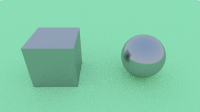

In [4]:
world = HittableList()

model = Model('../../../Atividade03/objs/Cube.obj', Metal(Color([0.5, 0.5, 0.5]), fuzz=0.1))
model.translate(Vec3([1, 0, 0]))
for face in model.faces:
    world.add(face)

world.add(
    Sphere(
        Point3([-1, 0, 0]), 
        0.5,
        Metal(Color([0.5, 0.5, 0.5]), fuzz=0.1)
    )
)

world.add(
    Sphere(
        Point3([0, -100.5, -1]), 
        100,
        Lambertian(Color([0.5, 1, 0.5]))
    )
)

camera.render(world, '../../imgs/final-metals.png')

## Criando a cena para vidros (refração)

  0%|          | 0/112 [00:00<?, ?it/s]

100%|██████████| 112/112 [1:29:50<00:00, 48.13s/it]


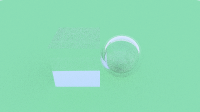

In [5]:
world = HittableList()

model = Model('../../../Atividade03/objs/Cube.obj', Dielectric(1.5))
model.translate(Vec3([0.5, 0, 0]))
for face in model.faces:
    world.add(face)

world.add(
    Sphere(
        Point3([-0.5, 0, 0]), 
        0.5,
        Dielectric(1.5)
    )
)

world.add(
    Sphere(
        Point3([-0.5, 0, 0]), 
        -0.4,
        Dielectric(1.5)
    )
)

world.add(
    Sphere(
        Point3([0, -100.5, -1]), 
        100,
        Lambertian(Color([0.5, 1, 0.5]))
    )
)

camera.render(world, '../../imgs/final-glasses.png')